In [ ]:
#####IMPORTS
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv('/content/Store.csv')
df.shape



(985, 8)

In [ ]:
# Display basic info about the dataset

print('\n')
print(df.head())
print('\n')
print(df.info())
print('\n')




   Unnamed: 0   revenue  reach  local_tv  online  instore  person       event
0         845  45860.28      2  31694.91    2115     3296       8   non_event
1         483  63588.23      2  35040.17    1826     2501      14     special
2         513  23272.69      4  30992.82    1851     2524       6     special
3         599  45911.23      2  29417.78    2437     3049      12     special
4         120  36644.23      2  35611.11    1122     1142      13  cobranding


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  985 non-null    int64  
 1   revenue     985 non-null    float64
 2   reach       985 non-null    int64  
 3   local_tv    929 non-null    float64
 4   online      985 non-null    int64  
 5   instore     985 non-null    int64  
 6   person      985 non-null    int64  
 7   event       985 non-null    object 
dtypes: float6

In [ ]:
print(df.describe(include = 'all'))

        Unnamed: 0       revenue       reach      local_tv       online  \
count   985.000000    985.000000  985.000000    929.000000   985.000000   
unique         NaN           NaN         NaN           NaN          NaN   
top            NaN           NaN         NaN           NaN          NaN   
freq           NaN           NaN         NaN           NaN          NaN   
mean    499.422335  38357.355025    3.395939  31324.061109  1596.527919   
std     288.784695  11675.603883    1.011913   3970.934733   496.131586   
min       0.000000   5000.000000    0.000000  20000.000000     0.000000   
25%     251.000000  30223.600000    3.000000  28733.830000  1253.000000   
50%     500.000000  38159.110000    3.000000  31104.520000  1607.000000   
75%     748.000000  45826.520000    4.000000  33972.410000  1921.000000   
max     999.000000  79342.070000    7.000000  43676.900000  3280.000000   

            instore      person       event  
count    985.000000  985.000000         985  
unique 

In [ ]:
######Missing values
# Identify the columns containing missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns)

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the result
print("Missing values in each column:")
print(missing_values)

Columns with missing values: Index(['local_tv'], dtype='object')
Missing values in each column:
Unnamed: 0     0
revenue        0
reach          0
local_tv      56
online         0
instore        0
person         0
event          0
dtype: int64


In [ ]:
# Replacing missing values with mode if object and with mean if number
for column in missing_columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

#Check for change
missing_values = df.isnull().sum()
print("New missing values in each column:")
print(missing_values)

New missing values in each column:
Unnamed: 0    0
revenue       0
reach         0
local_tv      0
online        0
instore       0
person        0
event         0
dtype: int64


In [ ]:
######Categorical values
df.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

In [ ]:
#OneHotHotEncoder
#Transform 'event' to a numeric variable
df_transformed = pd.get_dummies(df)


#Check the change
print(df_transformed.head(10))

   Unnamed: 0   revenue  reach  local_tv  online  instore  person  \
0         845  45860.28      2  31694.91    2115     3296       8   
1         483  63588.23      2  35040.17    1826     2501      14   
2         513  23272.69      4  30992.82    1851     2524       6   
3         599  45911.23      2  29417.78    2437     3049      12   
4         120  36644.23      2  35611.11    1122     1142      13   
5         867  36172.81      4  22372.59    2001     1881      17   
6         847  43797.03      3  31443.74    1667     1846      15   
7         950  41629.80      4  35775.75    1155     2715      12   
8         942  21303.48      2  24888.31    1853     3677       4   
9         550  20746.15      4  26623.48    1497     3075       9   

   event_cobranding  event_holiday  event_non_event  event_special  
0                 0              0                1              0  
1                 0              0                0              1  
2                 0              

In [ ]:
#drop unnecessary columns
del df_transformed['Unnamed: 0']
#Check for change
print(df_transformed.head(10))

    revenue  reach  local_tv  online  instore  person  event_cobranding  \
0  45860.28      2  31694.91    2115     3296       8                 0   
1  63588.23      2  35040.17    1826     2501      14                 0   
2  23272.69      4  30992.82    1851     2524       6                 0   
3  45911.23      2  29417.78    2437     3049      12                 0   
4  36644.23      2  35611.11    1122     1142      13                 1   
5  36172.81      4  22372.59    2001     1881      17                 1   
6  43797.03      3  31443.74    1667     1846      15                 1   
7  41629.80      4  35775.75    1155     2715      12                 0   
8  21303.48      2  24888.31    1853     3677       4                 0   
9  20746.15      4  26623.48    1497     3075       9                 0   

   event_holiday  event_non_event  event_special  
0              0                1              0  
1              0                0              1  
2              0     

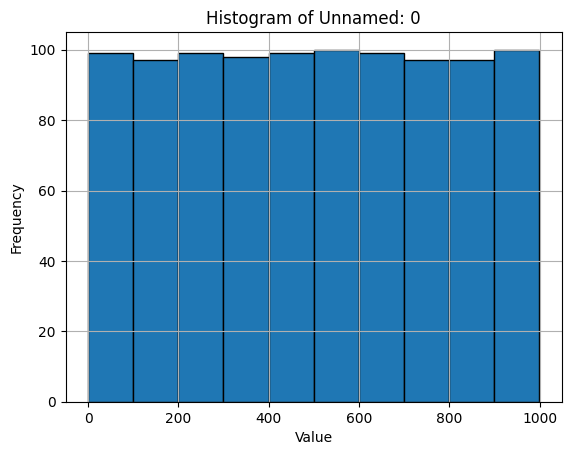

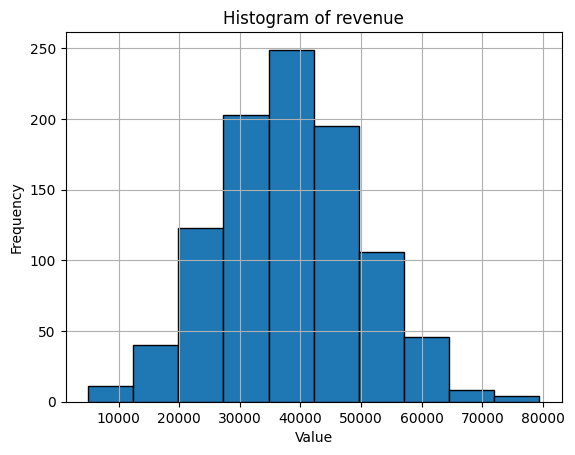

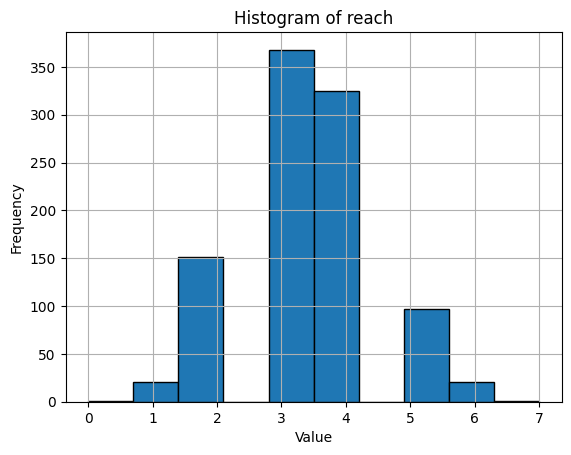

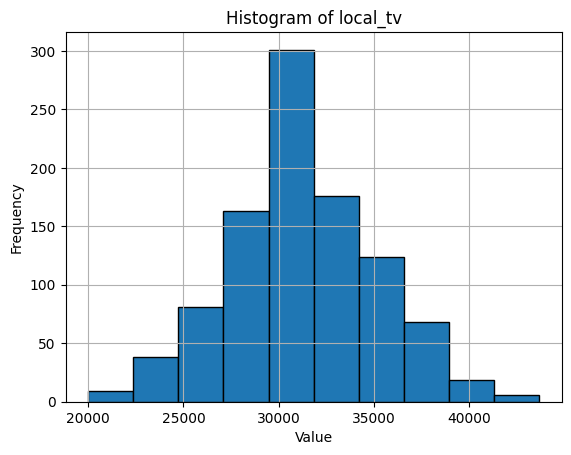

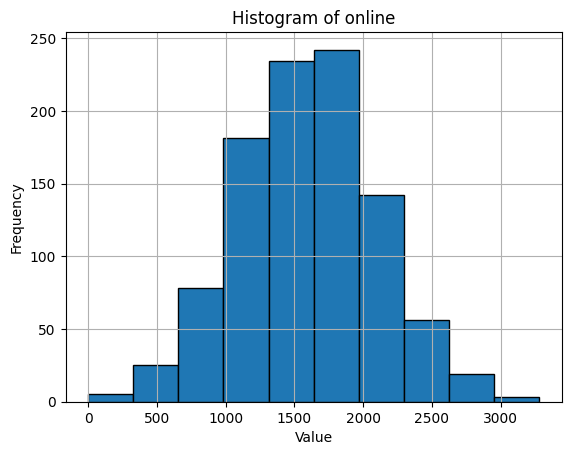

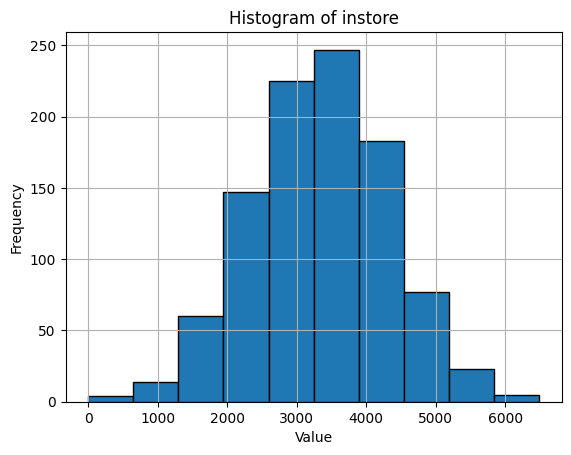

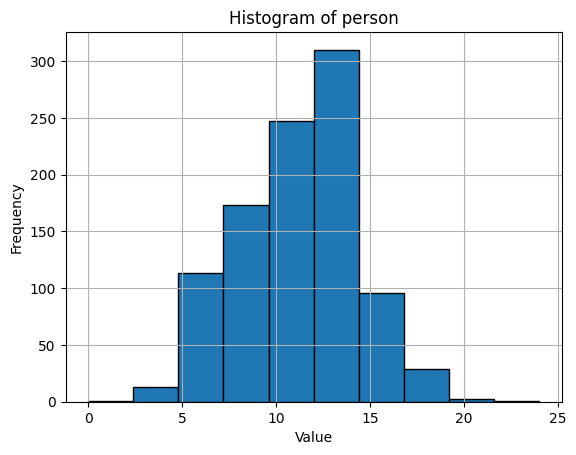

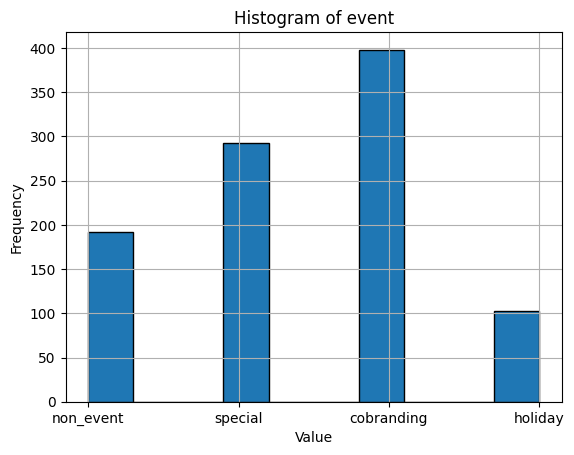

In [ ]:
#####DATA VISUALIZATION
import pandas as pd
import matplotlib.pyplot as plt


# Plotting histograms for each column
for column in df.columns:
    plt.hist(df[column], edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()


In [ ]:
# Check if DataFrame contains NaN values
if df_transformed.isna().any().any():
    print("DataFrame contains NaN values")
else:
    print("DataFrame does not contain NaN values")

DataFrame does not contain NaN values


In [ ]:
# Display all NaN values
nan_values = df_transformed[df_transformed.isna()]
print(nan_values)

     revenue  reach  local_tv  online  instore  person  event_cobranding  \
0        NaN    NaN       NaN     NaN      NaN     NaN               NaN   
1        NaN    NaN       NaN     NaN      NaN     NaN               NaN   
2        NaN    NaN       NaN     NaN      NaN     NaN               NaN   
3        NaN    NaN       NaN     NaN      NaN     NaN               NaN   
4        NaN    NaN       NaN     NaN      NaN     NaN               NaN   
..       ...    ...       ...     ...      ...     ...               ...   
980      NaN    NaN       NaN     NaN      NaN     NaN               NaN   
981      NaN    NaN       NaN     NaN      NaN     NaN               NaN   
982      NaN    NaN       NaN     NaN      NaN     NaN               NaN   
983      NaN    NaN       NaN     NaN      NaN     NaN               NaN   
984      NaN    NaN       NaN     NaN      NaN     NaN               NaN   

     event_holiday  event_non_event  event_special  
0              NaN              Na

In [ ]:
#####LINEAR REGRESSION (CASE 1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Specify features and target
X = df_transformed.drop(['revenue'], axis=1)
y = df_transformed['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model1 = LinearRegression()

# Train the model on the training set
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#model.intercept_
#model.coef_

# Display the coefficients and intercept
slope = model1.coef_[0]
intercept = model1.intercept_

# Display the regression equation
print(f'Regression Equation: y = {slope:.2f} * x + {intercept:.2f}')
print(model1.coef_)



Mean Squared Error: 25214969.655344702
R-squared: 0.7964893041421783
Regression Equation: y = -2064.00 * x + -52069.29
[-2.06400306e+03  1.74067581e+00  3.55199391e+00  4.28969427e+00
  2.06766363e+03  1.10462718e+02  5.90329518e+02 -7.06169254e+02
  5.37701819e+00]


In [ ]:
from statsmodels.formula.api import ols
model=ols('y~X',df_transformed).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     495.7
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:13:04   Log-Likelihood:                -9823.1
No. Observations:                 985   AIC:                         1.966e+04
Df Residuals:                     976   BIC:                         1.971e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.131e+04   1416.468    -29.164      0.0

In [ ]:
df_transformed.corr()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.588349,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.033206,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.588349,-0.033206,1.000000,0.006666,-0.045598,0.047622,0.020289,-0.038305,0.011029,-0.005702
online,0.171227,-0.025141,0.006666,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.045598,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.047622,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020289,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.038305,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011029,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005702,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='local_tv', ylabel='revenue'>

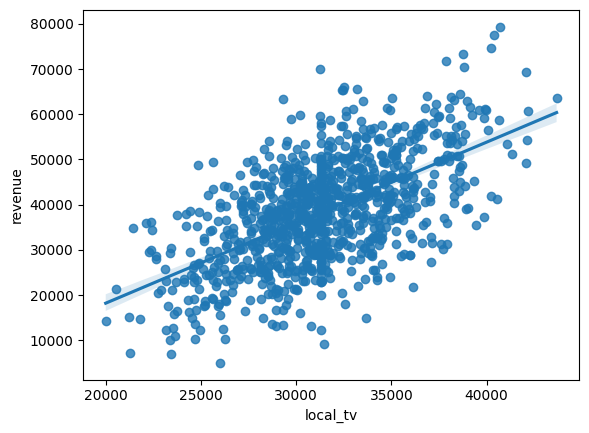

In [ ]:
sns.regplot(x = 'local_tv', y = 'revenue', data = df_transformed)

<Axes: xlabel='person', ylabel='revenue'>

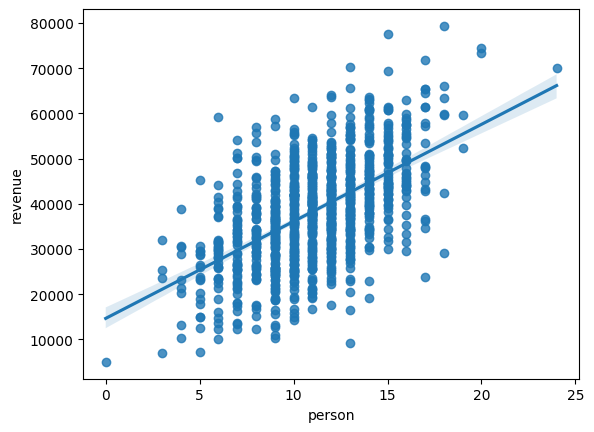

In [ ]:
sns.regplot(x = 'person', y = 'revenue', data = df_transformed)

<Axes: xlabel='instore', ylabel='revenue'>

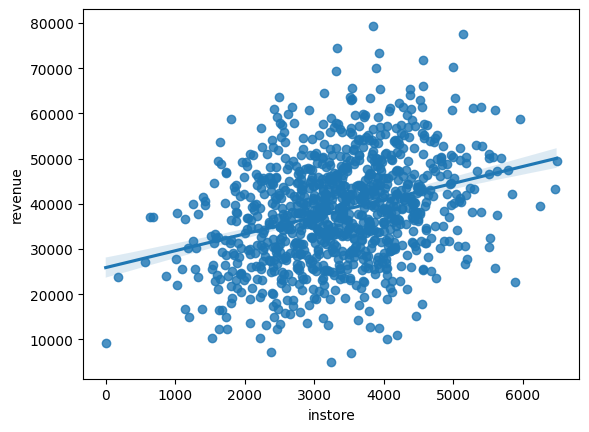

In [ ]:
sns.regplot(x = 'instore', y = 'revenue', data = df_transformed)

<Axes: xlabel='online', ylabel='revenue'>

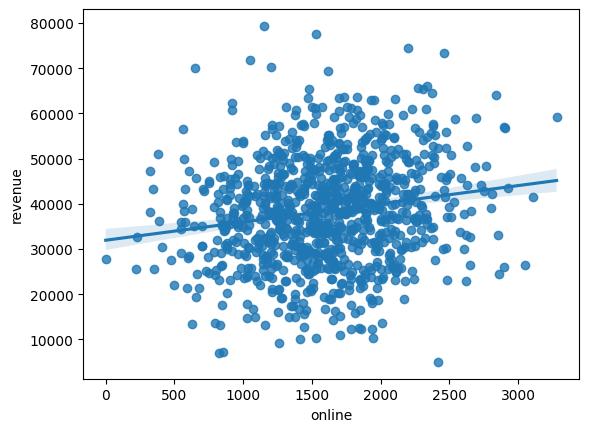

In [ ]:
sns.regplot(x = 'online', y = 'revenue', data = df_transformed)

<Axes: xlabel='event_special', ylabel='revenue'>

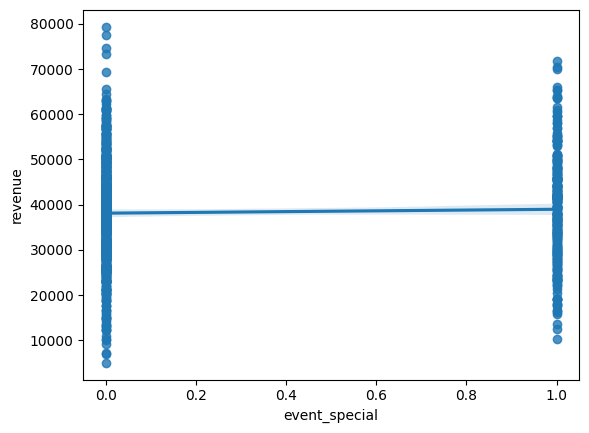

In [ ]:
sns.regplot(x = 'event_special', y = 'revenue', data = df_transformed)

In [ ]:
#####LINEAR REGRESSION (CASE 2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Specify features and target
X = df_transformed[['person','local_tv','online','instore', 'event_special']]
y = df_transformed['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#model.intercept_
#model.coef_

# Display the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Display the regression equation
print(f'Regression Equation: y = {slope:.2f} * x + {intercept:.2f}')
print(model.coef_)

Mean Squared Error: 30187459.022308774
R-squared: 0.7563562091970499
Regression Equation: y = 2016.13 * x + -59645.86
[2.01613413e+03 1.77745631e+00 3.63309520e+00 4.22590165e+00
 2.12144792e+02]


In [ ]:
#####LINEAR REGRESSION (CASE 3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Specify features and target
X = df_transformed[['local_tv','person','instore']]
y = df_transformed['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#model.intercept_
#model.coef_

# Display the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Display the regression equation
print(f'Regression Equation: y = {slope:.2f} * x + {intercept:.2f}')
print(model.coef_)



Mean Squared Error: 34206676.60910881
R-squared: 0.7239169963376249
Regression Equation: y = 1.78 * x + -53889.36
[1.77782422e+00 2.03874841e+03 4.16483954e+00]


In [ ]:
from statsmodels.formula.api import ols
model=ols('y~X',df_transformed).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     959.2
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          4.09e-291
Time:                        02:07:35   Log-Likelihood:                -9947.5
No. Observations:                 985   AIC:                         1.990e+04
Df Residuals:                     981   BIC:                         1.992e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.288e+04   1804.489    -29.305      0.0

In [ ]:
#####LINEAR REGRESSION (CASE 4)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Specify features and target
X = df_transformed[['local_tv','online','instore','person']]
y = df_transformed['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#model.intercept_
#model.coef_

# Display the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Display the regression equation
print(f'Regression Equation: y = {slope:.2f} * x + {intercept:.2f}')
print(model.coef_)

Mean Squared Error: 30130476.369398326
R-squared: 0.7568161177158441
Regression Equation: y = 1.78 * x + -59589.81
[1.77718451e+00 3.64170806e+00 4.22550796e+00 2.01646351e+03]
